<a href="https://colab.research.google.com/github/mark-nick-o/AIML_SoundArtsProject/blob/main/CycleGAN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CycleGAN and pix2pix in PyTorch

The code was written by Jun-Yan Zhu and Taesung Park, and supported by Tongzhou Wang, based on the paper "Unpaired Image-to-Image Translation
using Cycle-Consistent Adversarial Networks"[https://arxiv.org/pdf/1703.10593.pdf] 

Please take a look at the [repository](https://github.com/mashyko/pytorch-CycleGAN-and-pix2pix/)  https://github.com/mashyko/pytorch-CycleGAN-and-pix2pix/ for more information

このノートブックの詳しい使用法については、こちらのサイトをご覧ください。https://www.koi.mashykom.com/dcgan.html

# Install

In [1]:
!git clone https://github.com/mashyko/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2291, done.
remote: Total 2291 (delta 0), reused 0 (delta 0), pack-reused 2291
Receiving objects: 100% (2291/2291), 13.53 MiB | 19.99 MiB/s, done.
Resolving deltas: 100% (1445/1445), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 676 kB 6.3 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=52d1ba05783f458ba49ccfa42f6fec1dcdf507d659a9ec7e97aa8b7c623ebd00
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5710 sha256=bed16caa64577ba61764393d75ef92fa84d0a62b5afacd6bc807b0b3cb9d7a9f
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [4]:
!bash ./datasets/download_cyclegan_dataset.sh monet2photo #horse2zebra

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/monet2photo/trainB/2016-03-31 05:58:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2014-01-10 12:46:39.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-02-23 11:45:00.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-05-23 09:38:08.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-01-15 00:48:49.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-12-27 18:15:26.jpg  
  inflating: ./datasets/monet2photo/trainB/2017-01-02 11:16:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-06 11:08:32.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-12-16 07:43:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-03-25 12:57:28.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-05-10 11:44:44.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-03-11 08:01:52.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-30 05:26:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-10-0

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
!bash ./scripts/download_cyclegan_model.sh monet2photo #horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [monet2photo]
for details.

--2021-08-28 15:54:21--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’

./checkpoints/monet 100%[===================>]  43.46M   919KB/s    in 31s     

2021-08-28 15:54:52 (1.41 MB/s) - ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [6]:
!python test.py --dataroot datasets/monet2photo/testA --name monet2photo_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize fake images and real pictures

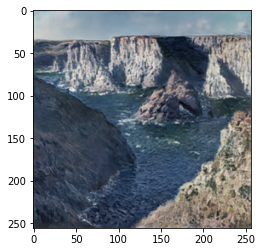

In [15]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00550_fake.png')
plt.imshow(img)

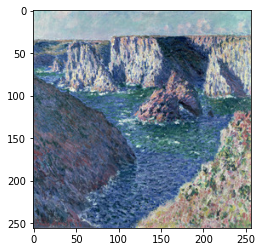

In [16]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00550_real.png')
plt.imshow(img)

Monetの画像を浮世絵風に変換

In [18]:
!bash ./datasets/download_cyclegan_dataset.sh vangogh2photo #monet2photo

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/vangogh2photo/trainB/2016-08-26 19:25:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-20 16:54:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-19 19:43:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-26 21:18:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-19 15:39:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-13 21:21:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-04 14:10:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-18 12:46:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-17 18:07:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-24 17:24:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-27 12:45:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-14 05:57:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-24 01:48:36.jpg  
  inflating: ./datasets/va

In [19]:
!bash ./scripts/download_cyclegan_model.sh style_cezanne #style_ukiyoe

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_cezanne]
for details.

--2021-08-28 16:12:57--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_cezanne.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_cezanne_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  1.81MB/s    in 24s     

2021-08-28 16:13:22 (1.78 MB/s) - ‘./checkpoints/style_cezanne_pretrained/latest_net_G.pth’ saved [45575747/45575747]

In [20]:
!python test.py --dataroot datasets/vangogh2photo/testA/ --name style_cezanne_pretrained --model test --results_dir ./results/ --no_dropout


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/vangogh2photo/testA/ 	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

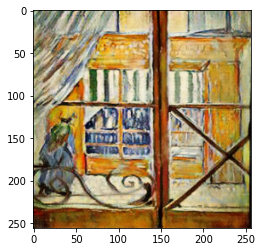

In [23]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_cezanne_pretrained/test_latest/images/00005_fake.png')
plt.imshow(img)

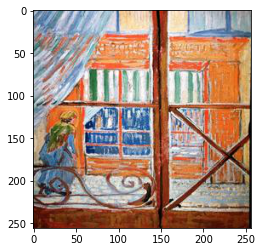

In [22]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_cezanne_pretrained/test_latest/images/00005_real.png')
plt.imshow(img)

custom images load from
 directory /datasets/photo2image/testA/ 

 i added my own to /datasets/photo2image/testB

In [30]:
!bash ./scripts/download_cyclegan_model.sh style_ukiyoe #summer2winter_yosemite #style_vangogh

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_ukiyoe]
for details.

--2021-08-28 17:33:55--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_ukiyoe.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  3.75MB/s    in 12s     

2021-08-28 17:34:07 (3.62 MB/s) - ‘./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [31]:
!python test.py --dataroot datasets/photo2image/testB --name style_ukiyoe_pretrained --model test --results_dir ./results/ --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/photo2image/testB    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

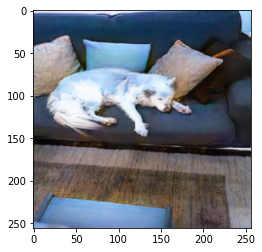

In [28]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/20203010_fake.png')
plt.imshow(img)

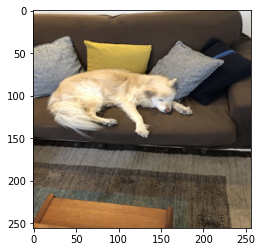

In [29]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/20203010_real.png')
plt.imshow(img)

# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan

Traceback (most recent call last):
  File "train.py", line 52, in <module>
    model.optimize_parameters()   # calculate loss functions, get gradients, update network weights
  File "/content/pytorch-CycleGAN-and-pix2pix/models/cycle_gan_model.py", line 187, in optimize_parameters
    self.backward_G()             # calculate gradients for G_A and G_B
  File "/content/pytorch-CycleGAN-and-pix2pix/models/cycle_gan_model.py", line 178, in backward_G
    self.loss_G.backward()
  File "/usr/local/lib/python3.6/dist-packages/torch/tensor.py", line 195, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph)
  File "/usr/local/lib/python3.6/dist-packages/torch/autograd/__init__.py", line 99, in backward
    allow_unreachable=True)  # allow_unreachable flag
KeyboardInterrupt


以上